### Wind power

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Aerodinamic model

$$\lambda = \lambda_b\left( \frac{\omega_w/\omega_b}{\nu_w/\nu_{wb}}          \right)$$

$$ \frac{1}{\lambda_i} =  \frac{1}{\lambda + 0.08\beta} -  \frac{0.035}{\beta^3 + 1.0}    $$


$$c_p = C_1 \left(C_2 \frac{1}{\lambda_i} - C_3 \beta - C_4\right) e^\left(-C_5 \frac{1}{\lambda_i}\right) + C_6 \lambda $$
$$c_p^{pu} = \frac{c_p}{c_{pb}}$$

$$p_m = K_p c_p^{pu} \left(\frac{\nu_w}{\nu_{wb}}\right)^3$$

### MPPT


$$\hat \nu_w = \nu_{wb}\frac{\omega_t}{\omega_b}$$  

$$ \frac{1}{\hat \lambda_i} =  \frac{1}{\lambda_{opt}} -  0.035    $$

$$\hat c_p = C_1 \left(C_2 \frac{1}{\hat \lambda_i} - C_4\right) e^\left(-C_5 \frac{1}{\hat \lambda_i}\right) + C_6 \lambda_{opt} $$
$$\hat c_p^{pu} = \frac{\hat c_p}{c_{pb}}$$

$$\hat p_m = K_p \hat c_p^{pu} \left(\frac{\hat \nu_w}{\nu_{wb}}\right)^3$$



### Two mass drive train

$$
\dot \theta_{tr} = \omega_t-\omega_r
$$

$$\dot \omega_t  = \frac{1}{2 H_t}\left(p_m - K_{tr} \theta_{tr} - D_{tr}\left(\omega_t-\omega_r\right)\right)$$
$$\dot \omega_r  = \frac{1}{2 H_r}\left(K_{tr} \theta_{tr} + D_{tr}\left(\omega_t-\omega_r  \right) -p_e\right)$$

In [2]:
def Piecewise(*args):
    for item in args:
        if item[1]: return item[0]

In [3]:
beta = 0.0
C_1 = 0.5176
C_2 = 116
C_3 = 0.4
C_4 = 5.0
C_5 = 21 
C_6 = 0.0068
nu_w_b = 12
lam_b = 8.1
lam_opt = lam_b
omega_b = 1.2
c_p_b = 0.48
K_p = 0.73
lam = lam_b
inv_lam_i =  1/(lam + 0.08*beta) - 0.035/(beta**3 + 1.0)   
c_p = C_1*(C_2*inv_lam_i - C_3*beta - C_4)*np.exp(-C_5*inv_lam_i) + C_6*lam 
c_p_pu = c_p/c_p_b # (pu)
#p_m_ref = K_p*c_p*(nu_w/nu_w_b)**3
p_ref = 0.657/0.9
nu_w_0 = (p_ref/(K_p*c_p_pu))**(1.0/3.0)*nu_w_b
omega_w_0 = lam*(nu_w_0/nu_w_b)/lam_b*omega_b
print(f'nu_w_0 = {nu_w_0}, omega_w_0 = {omega_w_0}')

nu_w_0 = 11.999900814053506, omega_w_0 = 1.1999900814053506


In [4]:
Dt = 0.01
times = np.arange(0,60.0,Dt)

N_t = len(times)
N_x = 5
U = np.zeros((N_t,1))
X = np.zeros((N_t,N_x))
Z = np.zeros((N_t,10))



# parameters tool
C_1 = 0.5176
C_2 = 116
C_3 = 0.4
C_4 = 5.0
C_5 = 21 
C_6 = 0.0068
nu_w_b = 12
lam_b = 8.1
omega_b = 1.2
K_p = 0.73
## 2 mass mechanical model
omega_ref = 2*np.pi*0.5
zeta_ref = 0.05
H_t =3.0
H_r =1.0
K_tr = 2*H_r*H_t*omega_ref**2/(H_r + H_t)
D_tr =  4*np.pi*H_r*H_t*zeta_ref*omega_ref/(H_r + H_t)
## c_p_b:
beta_b = 0.0
lam = lam_b
inv_lam_i =  1/(lam + 0.08*beta_b) - 0.035/(beta_b**3 + 1.0)   
c_p_b = C_1*(C_2*inv_lam_i - C_3*beta_b - C_4)*np.exp(-C_5*inv_lam_i) + C_6*lam 
T_beta = 2.0
K_beta = 100.0
T_mppt = 5

# initial conditions
beta = 0.0  # initial input
p_ref = 0.5*0.657/0.9 # initial input
inv_lam_i =  1/(lam + 0.08*beta) - 0.035/(beta**3 + 1.0)   
c_p = C_1*(C_2*inv_lam_i - C_3*beta - C_4)*np.exp(-C_5*inv_lam_i) + C_6*lam 
c_p_pu = c_p/c_p_b # (pu)
#p_m_ref = K_p*c_p*(nu_w/nu_w_b)**3
nu_w_0 = (p_ref/(K_p*c_p_pu))**(1.0/3.0)*nu_w_b
omega_w_0 = lam*(nu_w_0/nu_w_b)/lam_b*omega_b
print(f'nu_w_0 = {nu_w_0}, omega_w_0 = {omega_w_0}')

x = np.array([p_ref/K_tr, omega_w_0, omega_w_0, beta,p_ref]).reshape(N_x,1)

nu_w = nu_w_0

Dp_e_ref = 0
nu_w = nu_w_0

for it,t in enumerate(times):
      
    # inputs
    
    #t_pert_1 = 5.0
    #if t>t_pert_1 and t<(t_pert_1+10):
    #    nu_w = (0.1*(t-t_pert_1) + 1.0)*nu_w_0
#
    #t_pert_2 = 25.0
    #if t>t_pert_2 and t<(t_pert_2+10):
    #    nu_w = (0.1*10 - 0.1*(t-t_pert_2) + 1.0)*nu_w_0
        
    if t>10:
        Dp_e_ref = -0.2

    
    theta_tr, omega_t, omega_r, beta,p_m_mppt_lpf = x
        
    #auxiliar
    ## model
    lam = lam_b*(omega_t/omega_b)/(nu_w/nu_w_b) # pu
    inv_lam_i =  1/(lam + 0.08*beta) - 0.035/(beta**3 + 1.0)   
    c_p = C_1*(C_2*inv_lam_i - C_3*beta - C_4)*np.exp(-C_5*inv_lam_i) + C_6*lam 
    c_p_pu = c_p/c_p_b # (pu)
    p_m = K_p*c_p_pu*(nu_w/nu_w_b)**3

    ## MPPT
    beta_mppt = 0.0
    nu_w_mppt = nu_w_b*(omega_t/omega_b)    
    inv_lam_i_mppt =  1/(lam_opt) - 0.035   
    c_p_mppt = C_1*(C_2*inv_lam_i_mppt - C_3*beta_mppt - C_4)*np.exp(-C_5*inv_lam_i_mppt) + C_6*lam_opt 
    c_p_mppt_pu = c_p_mppt/c_p_b # (pu)
    p_m_mppt_ref = K_p*c_p_mppt_pu*(nu_w_mppt/nu_w_b)**3
    K_mppt = 1.0
    omega_r_th = 0.2
    #if np.abs(Dp_e)>0.01 and omega_r>omega_r_th:
    #    p_m_mppt = p_m_mppt_lpf
    #    K_mppt = 0.0
    #else:
    #    p_m_mppt = p_m_mppt_ref
    #    K_mppt = 1.0   
    #    Dp_e = Dp_e_ref * (1 + 50*(omega_r - omega_r_th))
     
    np.abs(Dp_e_ref)>0.01 and omega_r>omega_r_th
    mode_remote = 
    
    test_1 = np.abs(Dp_e_ref)>0.01 and omega_r>omega_r_th
    p_m_mppt = PieceWise([(test_1,p_m_mppt_lpf), (True,p_m_mppt_ref)])
    K_mppt = PieceWise([(test_1,0.0), (True,1.0)])
    Dp_e = PieceWise([(test_1,Dp_e_ref), (True,Dp_e_ref * (1 + 50*(omega_r - omega_r_th)))])
                        
        
        
    #p_m_mppt = PieceWise([(Dp_e<0.01,0.0), (Dp_e>0.01,0.0),(True,p_m_mppt_ref)])
    p_e = p_m_mppt_lpf + Dp_e
    
    ## pitch control
    beta_ref = PieceWise([(omega_r<=omega_b,0.0), (omega_r>omega_b,K_beta*(omega_r-omega_b)),(True,0.0)])
    
    # differential equations

    
    dtheta_tr = omega_t-omega_r
    domega_t  = 1.0/(2*H_t)*(p_m - K_tr*theta_tr - D_tr*(omega_t-omega_r))
    domega_r  = 1.0/(2*H_r)*(K_tr*theta_tr + D_tr*(omega_t-omega_r) - p_e)
    dbeta     = 1.0/T_beta*(beta_ref - beta)
    dp_m_mppt_lpf     = K_mppt/T_mppt*(p_m_mppt - p_m_mppt_lpf)
        
    f = np.array([dtheta_tr,domega_t,domega_r,dbeta,dp_m_mppt_lpf])
    
    # outputs
    x += Dt*f
    
    U[it,0] = nu_w
    X[it,:] = x[:,0]
    
    Z[it,0] = nu_w
    Z[it,1] = omega_r
    Z[it,2] = p_e
    Z[it,3] = p_m
    Z[it,4] = beta_ref
 

SyntaxError: invalid syntax (2468498872.py, line 101)

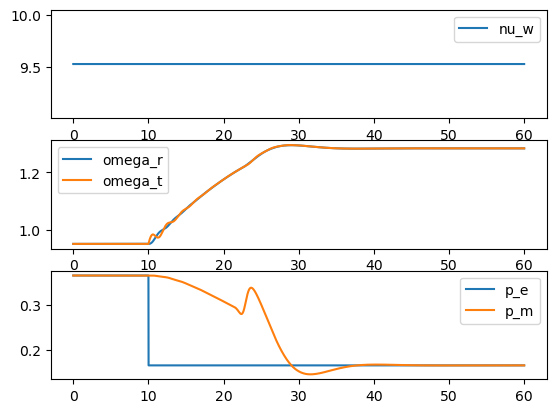

In [31]:
fig,axes = plt.subplots(nrows=3)

axes[0].plot(times,  Z[:,0], label='nu_w')
axes[1].plot(times,  X[:,1], label='omega_r')
axes[1].plot(times,  X[:,2], label='omega_t')
axes[2].plot(times,  Z[:,2], label='p_e')
axes[2].plot(times,  Z[:,3], label='p_m')

for ax in axes:
    ax.legend()

In [32]:
def p_m_eval(c_p,nu_w):
    K_p = 1.0
    nu_w_b = 12
    
    p_m = K_p*c_p*(nu_w/nu_w_b)**3
    
    return p_m
    
def c_p_eval(nu_w,omega_w,beta):
    '''
    nu_w wind speed (pu)
    omega_w rotor speed (pu)
    beta blade pitch angle
    '''
    C_1 = 0.5176
    C_2 = 116
    C_3 = 0.4
    C_4 = 5.0
    C_5 = 21 
    C_6 = 0.0068
    nu_w_b = 12
    lam_b = 8.1
    omega_b = 1.2
    
    lam = lam_b*(omega_w/omega_b)/(nu_w/nu_w_b) # pu
    
    inv_lam_i =  1/(lam + 0.08*beta) - 0.035/(beta**3 + 1.0)   
    c_p = C_1*(C_2*inv_lam_i - C_3*beta - C_4)*np.exp(-C_5*inv_lam_i) + C_6*lam # (pu)
    
    return c_p

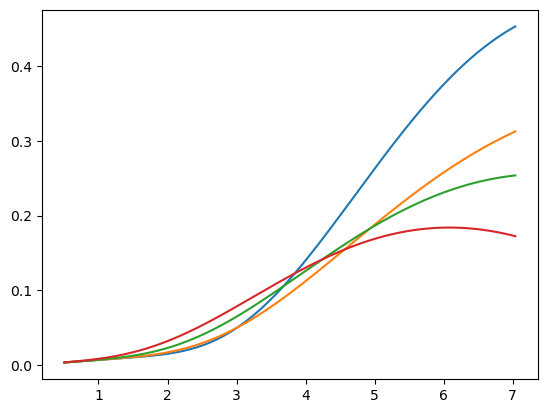

In [68]:
fig,axes = plt.subplots(nrows=1)

omega_ws = np.arange(0.1,1.4,0.01)

for beta in [0,5,10,15]:

    nu_w_b = 12
    lam_b = 8.1
    omega_b = 1.2
    c_ps =  c_p_eval(nu_w,omega_ws,beta)
    lams = lam_b*(omega_ws/omega_b)/(nu_w/nu_w_b)

    axes.plot(lams,  c_ps)


TypeError: p_m_eval() missing 1 required positional argument: 'beta'

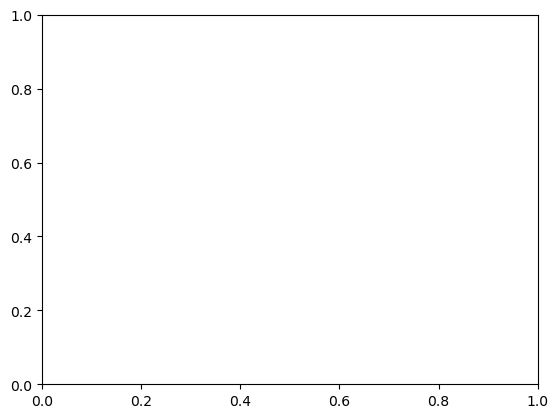

In [69]:
fig,axes = plt.subplots(nrows=1)

omega_ws = np.arange(0.1,1.4,0.01)
beta = 0.0
for nu_w in [4,6,8,10,12,14,16]:

    c_ps =  c_p_eval(nu_w,omega_ws,beta)
    p_ms = p_m_eval(c_ps,nu_w)

    axes.plot(omega_ws,  p_ms)

In [444]:
def p_m_eval(nu_w,omega_w,beta):
    '''
    nu_w wind speed (pu)
    omega_w rotor speed (pu)
    beta blade pitch angle
    '''
    C_1 = 0.5176
    C_2 = 116
    C_3 = 0.4
    C_4 = 5.0
    C_5 = 21 
    C_6 = 0.0068
    nu_w_b = 12
    lam_b = 8.1
    omega_b = 1.2
    K_p = 0.73
    
    #c_p_b:
    beta_b = 0.0
    lam = lam_b
    inv_lam_i =  1/(lam + 0.08*beta_b) - 0.035/(beta_b**3 + 1.0)   
    c_p_b = C_1*(C_2*inv_lam_i - C_3*beta_b - C_4)*np.exp(-C_5*inv_lam_i) + C_6*lam 

    ## model
    lam = lam_b*(omega_w/omega_b)/(nu_w/nu_w_b) # pu
    inv_lam_i =  1/(lam + 0.08*beta) - 0.035/(beta**3 + 1.0)   
    c_p = C_1*(C_2*inv_lam_i - C_3*beta - C_4)*np.exp(-C_5*inv_lam_i) + C_6*lam 
    c_p_pu = c_p/c_p_b # (pu)
    p_m = K_p*c_p_pu*(nu_w/nu_w_b)**3

    ## MPPT
    beta_mppt = beta
    lam_opt = lam_b
    lam = lam_opt
    nu_w = nu_w_b*lam_b*(omega_w/omega_b)/lam    
    inv_lam_i =  1/(lam + 0.08*beta_mppt) - 0.035/(beta_mppt**3 + 1.0)   
    c_p = C_1*(C_2*inv_lam_i - C_3*beta_mppt - C_4)*np.exp(-C_5*inv_lam_i) + C_6*lam 
    c_p_pu = c_p/c_p_b # (pu)
    p_m_mppt = K_p*c_p_pu*(nu_w/nu_w_b)**3
    
    return p_m,c_p,p_m_mppt

def mppt(omega_w,beta):
    '''
    nu_w wind speed (pu)
    omega_w rotor speed (pu)
    beta blade pitch angle
    '''
    C_1 = 0.5176
    C_2 = 116
    C_3 = 0.4
    C_4 = 5.0
    C_5 = 21 
    C_6 = 0.0068
    nu_w_b = 12
    lam_b = 8.1
    omega_b = 1.2
    K_p = 0.73
    c_p_b = 0.48
    
 
    

In [445]:
omega_w = 1.0
nu_w = 12
beta = 12
p_m_eval(nu_w,omega_w,beta) # p_m,c_p,p_m_mppt

(0.3407801694745414, 0.2081283478905837, 0.18317169001911612)

In [446]:
omega_w = 1.2
nu_w = 12
C_1 = 0.5176
C_2 = 116
C_3 = 0.4
C_4 = 5.0
C_5 = 21 
C_6 = 0.0068
nu_w_b = 12
lam_b = 8.1
omega_b = 1.2
K_p = 0.73

lam = lam_b*(omega_w/omega_b)/(nu_w/nu_w_b) # pu
lam

8.1

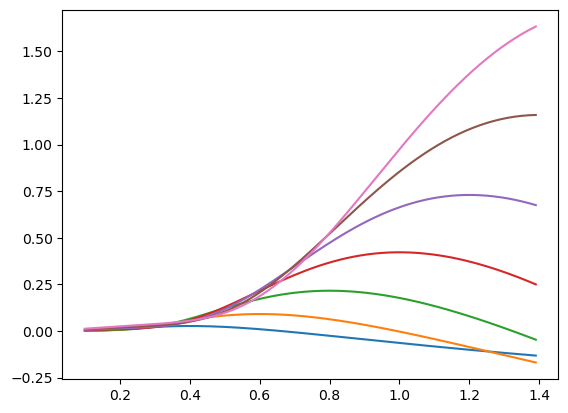

In [447]:
fig,axes = plt.subplots(nrows=1)

omega_ws = np.arange(0.1,1.4,0.01)
beta = 0.0
for nu_w in [4,6,8,10,12,14,16]:

    p_ms,c_ps,p_m_mppts = p_m_eval(nu_w,omega_ws,beta)

    axes.plot(omega_ws,  p_ms)

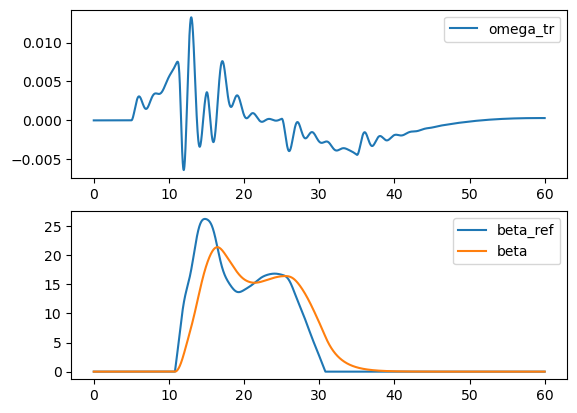

In [775]:
fig,axes = plt.subplots(nrows=2)

axes[0].plot(times,  X[:,1]-X[:,2], label='omega_tr')
axes[1].plot(times,  Z[:,4], label='beta_ref')
axes[1].plot(times,  X[:,3], label='beta')

for ax in axes:
    ax.legend()
    #ax.set_xlim(20,30)


In [721]:
# non simplified MPPt, beta can e diffrent from 0
# but with beta different from zero it is not working well (inestable)
beta_mppt = 0.0
nu_w_mppt = nu_w_b*lam_opt*(omega_t/omega_b)/lam_opt    
inv_lam_i_mppt =  1/(lam_opt + 0.08*beta_mppt) - 0.035/(beta_mppt**3 + 1.0)   
c_p_mppt = C_1*(C_2*inv_lam_i_mppt - C_3*beta_mppt - C_4)*np.exp(-C_5*inv_lam_i_mppt) + C_6*lam_opt 
c_p_mppt_pu = c_p_mppt/c_p_b # (pu)
p_m_mppt = K_p*c_p_mppt_pu*(nu_w_mppt/nu_w_b)**3

In [644]:
import sympy as sym
H_t,H_r,K_tr,D_tr = sym.symbols('H_t,H_r,K_tr,D_tr', real=True)
theta_tr,omega_t,omega_r,omega_tr = sym.symbols('theta_tr,omega_t,omega_r,omega_tr', real=True)
dtheta_tr,ddtheta_tr = sym.symbols('dtheta_tr,ddtheta_tr', real=True)
p_t,p_e,p_te = sym.symbols('p_t,p_e,p_te', real=True)
p_t,p_e,p_te = sym.symbols('p_t,p_e,p_te', real=True)
zeta_ref,omega_ref = sym.symbols('zeta_ref,omega_ref', real=True)


In [171]:
#dtheta_tr = 2*sym.pi*(omega_tr)
omega_tr = dtheta_tr/(2*sym.pi)
domega_t = 1/(2*H_t)*(p_te - K_tr*theta_tr + D_tr*omega_tr)
domega_r = 1/(2*H_r)*(K_tr*theta_tr -  D_tr*omega_tr)

eq = sym.collect(ddtheta_tr - sym.expand(sym.simplify(domega_t-domega_r)),[theta_tr,omega_tr])


In [172]:
str(eq)

'ddtheta_tr + dtheta_tr*(-D_tr/(2*H_t) - D_tr/(2*H_r))/(2*pi) + theta_tr*(K_tr/(2*H_t) + K_tr/(2*H_r)) - p_te/(2*H_t)'

In [173]:
(2*H_r*p_t - 2*H_t*p_e)/(4*H_t*H_r)

(2*H_r*p_t - 2*H_t*p_e)/(4*H_r*H_t)

In [174]:
# dtheta * (D_tr/(2*H_t) + D_tr/(2*H_r))

In [179]:
omega = sym.sqrt((K_tr/(2*H_t) + K_tr/(2*H_r)))
zeta = (-D_tr/(2*H_t) - D_tr/(2*H_r))/(2*sym.pi)/omega

sol = sym.solve([omega-omega_ref,zeta-zeta_ref],[K_tr,D_tr])
sol

[(2*H_r*H_t*omega_ref**2/(H_r + H_t),
  -4*pi*H_r*H_t*zeta_ref*Abs(omega_ref)/(H_r + H_t))]

In [186]:
omega_ref = 2*np.pi*1
zeta_ref = 0.1
H_t = 3.0
H_r = 1.0
K_tr = 2*H_r*H_t*omega_ref**2/(H_r + H_t)
D_tr =  -4*np.pi*H_r*H_t*zeta_ref*omega_ref/(H_r + H_t)

K_tr 

59.21762640653615

In [ ]:
domega_t - domega_r = (2*H_r*(p_m - K_tr*theta_tr) - 2*H_t*(p_m - K_tr*theta_tr))
domega_tr = (2*H_r*p_m/(4*H_t*H_r) - 2*H_r/(4*H_t*H_r)*K_tr*theta_tr - 2*H_t*p_m/(4*H_t*H_r) - 2*H_t/(4*H_t*H_r)*K_tr*theta_tr)


In [27]:


n=3
Piecewise((2,n>2),(4,True))

2